<a href="https://colab.research.google.com/github/SealsJ/US-Accidents-Exploratory-Analysis/blob/main/Jeremy_Seals_US_Accidents_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# United States ACCIDENTS (2016 - 2021) EXPLORATORY DATA ANALYSIS

Hello! This is an exploratory analyis using the data provided by SOBHAN MOOSAVI on kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

The purpose of this analysis is to uncover pivotal indicators or trends that are correlated with the number of accidents that occur in certain cities across the country. The goal of this analysis is to use the stories that are discovered within the dataset to prevent more accidents in the future and act as a starting point for an approach to make our roads safer. The dataset contains roughly 2.8 million records from the years 2016 - 2021 for 49 of the 50 contiguous United States, data relating to New York wasn't included, and was collected by multiple APIs that provide streaming traffic incident (or event) data. 

## Installations
- Installing the opendatasets library to download the US Accidents dataset from Kaggle.

In [4]:
pip install opendatasets --upgrade --quiet

In [5]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jeremyseals
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:02<00:00, 119MB/s]


In [6]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and Cleaning
1. We want to import the Pandas library to start exploring the dataset
2. Scan the dataset to uncover how the data is laid out in the columns
3. Determine the reliability and usage of any missing or incorrect values that we come across


In [2]:
#Import the pandas library
import pandas as pd

In [7]:
#Use pandas to read the csv file for our dataset and set that to a variable
df = pd.read_csv(data_filename)

In [ ]:
#Taking an initial glance at our dataset
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
#Doing some general analysis to determine how many columns, how many rows, and determine what our column types are
#number of columns
len(df.columns)
#number of rows
len(df)
#easier way to see this is df.info() which gives both and the types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [ ]:
#I'm interested in exploring the numerical columns more since that is where the major indicators are hidden
#df.desribe() will give a statistical summary of the numerical columns
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [ ]:
#Calculating the number of numerical columns in the dataframe if it was unknown as practice 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(numerics)
len(numeric_df.columns)

14

### Percentage of Missing Values per Column

In [ ]:
#Not all data is perfect, need to find out how much data each column is missing utilizing Pandas
#.isna() displays True/False depending on if there is a value present, .sum() will count the amnount of empty rows
#.sort_values(ascending=False) will list the amount of empty rows from greatest to least
#Dividing by the total length of the dataframe will give us a percentage of empty rows for the whole dataset
missing_values = df.isna().sum().sort_values(ascending=False) / len(df)
missing_values

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Country                  0.000000e+00
Junction                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Turning_Loop             0.000000e+00
Traffic_Sign

In [ ]:
#A lot of the rows aren't missing any data and we should exclude those to make a more presentable graph 
#The following assignment will only give us the values that do have missing rows
mv = missing_values[missing_values != 0]

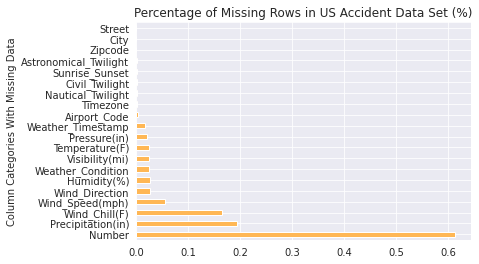

In [ ]:
# This is relevant to see what parts of the data I want to use
#if a column is missing > 50% might not be that useful or reliable to draw conclusions
mv.plot(kind='barh', xlabel='Column Categories With Missing Data', 
        title = 'Percentage of Missing Rows in US Accident Data Set (%)', color = '#FFB755')

- Based on the graph, the categories Number, Precipitation, and Wind Chill might not be that reliable since the APIs that collected the data are missing a lot of information that might not have been available.
- However, the cateogires like City, Zipcode, and Sunrise_Sunset aren't missing that much data and could still be used to draw conclusions.

## Exploratory Analysis and Data Visualization

Columns we'll analyze for key indicators/trends of accidents:
1. City (The city the accident occured in)
2. Start Time (The time of day the accident happened)
3. Start Lat, Start Lng (The Latitude and Longitude for the accident)

### City Column Analysis

In [ ]:
#I want to further explore the city column
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [ ]:
#There is a total of 2845341 entries in the dataset but Google states there are only 19,495 cities as of 2018
#I'm inclined to believe there are some duplicates in our dataset and want to find how many unique cities were found by the APIs
cities = df.City.unique()
len(cities)

11682

In [ ]:
#There are 11,682 unique cities in our dataset. It's impossible to look at all of them so maybe just the top few cities.
#.value_counts() will sort the cities by the amount of accidents in descending order
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [ ]:
#[:20] will look at the top 20 cities and list the amount of accidents recorded there
cities_by_accident[:20] 

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

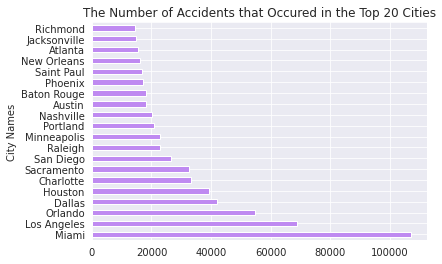

In [ ]:
#Visualizing the accidents sorted by the top 20 Cities
cities_by_accident[:20].plot(kind = 'barh', xlabel = 'City Names', 
        title = 'The Number of Accidents that Occured in the Top 20 Cities', color = '#BF8AF1')

In [ ]:
#Confirming that New York isn't in the dataset because it would've been in this graph for top 20 Cities
'NY' in df['State']

False

- The graph illustrates that Miami, Los Angeles, and Orlando are the three cities with the most accidents. Two of these cities, Orlando and Miami, come from Florida (Fl).
- I noticed a trend amongst the top 20 cities to experience the most accidents are dense cities with a high population and lots of urbanization.
- It can be inferred that if the State of New York was included in this dataset, the city New York City would've have been listed in this bar graph since it is the most populous city in America.

- 

In [10]:
#I want to further investigate the distribution (or the spread) of accidents per city utilizing a distibution plot
#importing seaborn library so I have access to more visualization tools
import seaborn as sns
sns.set_style('darkgrid')

#Importing matplotlib for more graph customization options
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution for Number of Accidents per City (2016 - 2021)')

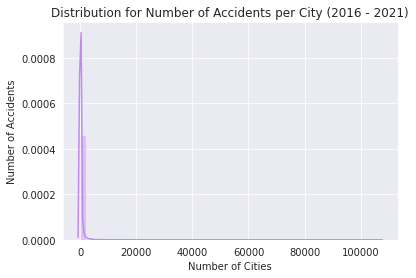

In [ ]:
#Utilizing a Distribution plot to determine how many accidents occur in ALL cities across the US
sns.displot(cities_by_accident, color = '#BF8AF1')
plt.xlabel("Number of Cities")
plt.ylabel('Number of Accidents')
plt.title('Distribution for Number of Accidents per City (2016 - 2021)')

- Most cities have maybe less than 2000 accidents total. 
- The graph also appears to follow an exponential distribution so perhaps a log base scale would be more insightful.

Text(0.5, 1.0, 'Distribution for Number of Accidents per City (2016 - 2021)')

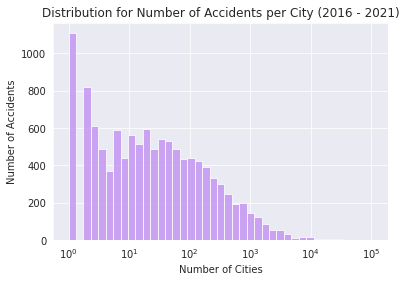

In [ ]:
# Log scale comparison since data is exponential 
sns.histplot(cities_by_accident, color = '#BF8AF1', log_scale=True)
plt.xlabel("Number of Cities")
plt.ylabel('Number of Accidents')
plt.title('Distribution for Number of Accidents per City (2016 - 2021)')

- After utilizing a log_scale approach, there is an apparent distribution forming in the graph but there is a high number of cities that experienced close to 0 accidents. This could be further investigated to see exactly how many and why? Is it missing data?
- Following the curve of the distribution, it can be observed that most cities in the US have experienced 10 - 100 accidents from 2016 - 2021.

In [ ]:
#I want to search for why there is a high volume of cities with close to 0 accidents across 2016 - 2021
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

- There is a lot of cities that only have 1 accident, 1110 cities to be exact. These could be removed to not skew the data for a high level analysis of the cities

#### What is the Number of High, Medium, and Low Accident Cities?
- Finding there percentages could also be helpful 

In [ ]:
#Separating the amount of accidents into three separate categories (high, medium, or low) to see if I can categorize the amount of accidents by city
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
mid_accident_cities = cities_by_accident[(cities_by_accident < 1000) & (cities_by_accident >= 500)]
low_accident_cities = cities_by_accident[cities_by_accident < 500]

In [ ]:
#What is the number of high accident cities?
print('The number of High Accident Cities are: ',len(high_accident_cities))
#What is that as a percentage of total cities?
print('High Accident Cities as a Percentage of Total Cities is: ',len(high_accident_cities) / len(cities)) 

The number of High Accident Cities are:  496
High Accident Cities as a Percentage of Total Cities is:  0.04245848313644924


In [ ]:
#What is the number of mid accident cities?
print('The number of Mid Accident Cities are: ',len(mid_accident_cities))
#What is that as a percentage of total cities?
print('Mid Accident Cities as a Percentage of Total Cities is: ',len(mid_accident_cities) / len(cities))

The number of Mid Accident Cities are:  466
Mid Accident Cities as a Percentage of Total Cities is:  0.039890429720938196


In [ ]:
#What is the number of low accident cities?
print('The number of Low Accident Cities are: ',len(low_accident_cities))
#What is that as a percentage of total cities?
print('Low Accident Cities as a Percentage of Total Cities is: ',len(low_accident_cities) / len(cities))

The number of Low Accident Cities are:  10719
Low Accident Cities as a Percentage of Total Cities is:  0.9175654853620955


- High Accident Cities (Greater than 1000 accidents): 496 ~ (4.2%)
- Mid Accident Cities (Between 1000 and 500): 466 ~ (3.9%)
- Low Accident Cities (Less than 500 accidents): 496 ~ (91.7%)

Text(0.5, 1.0, 'Distribution for Number of Accidents per High Accident City (2016 - 2021)')

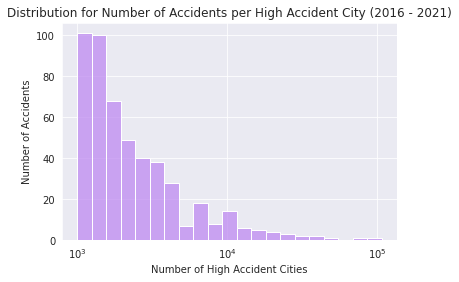

In [ ]:
#Showing the distribution of high accident cities
sns.histplot(high_accident_cities, color = '#BF8AF1', log_scale=True)
plt.xlabel("Number of High Accident Cities")
plt.ylabel('Number of Accidents')
plt.title('Distribution for Number of Accidents per High Accident City (2016 - 2021)')

Text(0.5, 1.0, 'Distribution for Number of Accidents per Mid Accident City (2016 - 2021)')

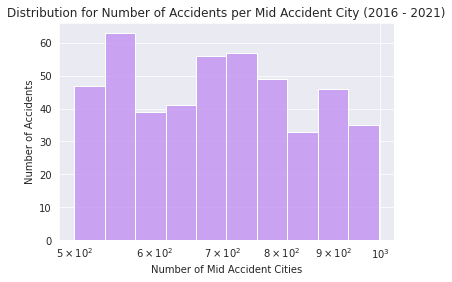

In [ ]:
#Showing the distribution of mid accident cities
sns.histplot(mid_accident_cities, color = '#BF8AF1', log_scale=True)
plt.xlabel("Number of Mid Accident Cities")
plt.ylabel('Number of Accidents')
plt.title('Distribution for Number of Accidents per Mid Accident City (2016 - 2021)')

Text(0.5, 1.0, 'Distribution for Number of Accidents per Low Accident City (2016 - 2021)')

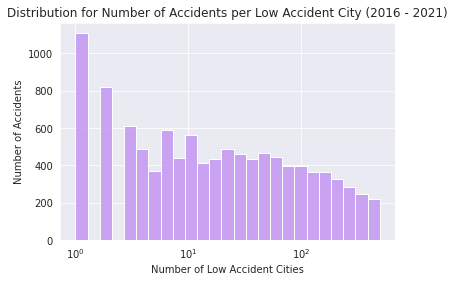

In [ ]:
#Showing the distribution of low accident cities
sns.histplot(low_accident_cities, color = '#BF8AF1', log_scale=True)
plt.xlabel("Number of Low Accident Cities")
plt.ylabel('Number of Accidents')
plt.title('Distribution for Number of Accidents per Low Accident City (2016 - 2021)')

- The Distributions of the high accident cities and low accident cities demonstrate an almost exponential disitrubution while the mid size cities are a more normalized distribution.
- This is to be expected since the mid accident cities would be between the two extremes of high and low accident cities.

### Start Time Analysis

In [ ]:
#Taking a look at the start time column. This column refers to when the accidents started in their local timezone.
df.Start_Time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [8]:
#I noticed the format might be of concern and want to convert to date time from an object
df.Start_Time = pd.to_datetime(df.Start_Time)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Percentage of Accidents Throughout the Hours of the Day (2016 - 2021)')

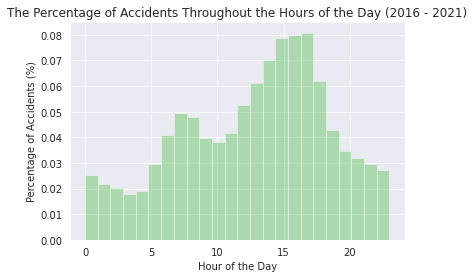

In [12]:
#Can't really graph the dataset with how the column is currently set up
#I must extract information into different sections to get charts that will give us more information about when accidents are occuring
#I'll focus on the hour accidents are occuring during the day
#Distribution plot to find what hour accidents are most likely to occur during the day
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde = False, norm_hist = True, color = '#4DBF4C')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents Throughout the Hours of the Day (2016 - 2021)')

- There is a spike in accidents during 6 - 9 am. This might be when people are commuting to work in the morning.
- There is also a dominant spike between 3 - 6 pm. This is when the cities might be the most active and also people rushing home afterwork. 

#### What Day do Most Accidents Occur During the Week?

Text(0.5, 1.0, 'The Percentage of Accidents Throughout the Days of the Week (2016 - 2021)')

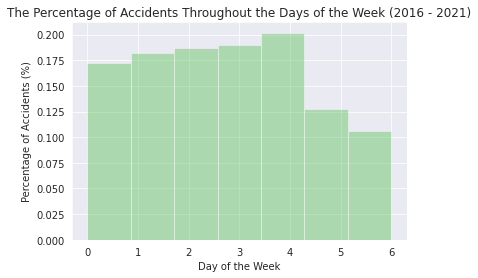

In [ ]:
#Distribution plots trying to uncover what day do most accidents occur?
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde = False, norm_hist = True, color = '#4DBF4C')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents Throughout the Days of the Week (2016 - 2021)')

- On a surface level observation, there appears to be more accidents happening during the week than during the weekend. This could be because people are staying home on the weekend and not commuting to work
- Friday is the day of the week with the most accidents which could be due to people going out with friends.
- The amount of accidents happening in the week steadily increases until Friday where it reaches an all time high before collapsing on the weekend. 

#### Is the Distribution of Accidents by Hour the Same on Weekends as on Weekdays?
- I want to see if the weekends and weekdays both share the same peaks in accidents between 6 - 9 am and 3 - 6 pm.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Percentage of Accidents Throughout the Hours of the Day (2016 - 2021)')

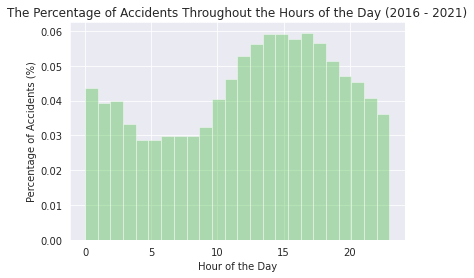

In [ ]:
#Looking at the distribution of accidents happening on Sunday
sunday_st= df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sunday_st.dt.hour, bins = 24, kde = False, norm_hist = True, color = '#4DBF4C')
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents Throughout the Hours of the Day (2016 - 2021)')

- For Sunday, the number of accidents appears to have a more normal distribution with a decrease in accidents during the morning that slowly escalates to a peak from 2 - 5 pm. 
- This could be because more people are active at that time during the day either out running errands, visiting friends, or getting off work.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Percentage of Accidents Throughout the Hours of the Day (2016 - 2021)')

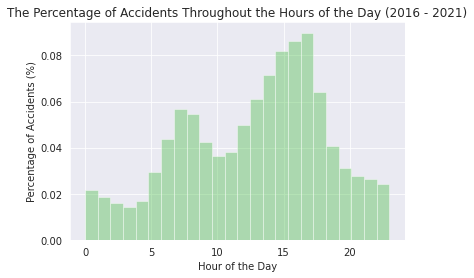

In [ ]:
wednesday_st = df.Start_Time[df.Start_Time.dt.dayofweek == 2]
sns.distplot(wednesday_st.dt.hour, bins = 24, kde = False, norm_hist = True, color = '#4DBF4C')
# During the week, accidents occur more often during morning and evening rush hours
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents Throughout the day for Wednesday (2016 - 2021)')
# The accidents seems more spread out on Sundays but heavily occur in the afternoon

- For Wednesday, there are peaks in accidents from 7 - 9 am before dipping down and then slowly increases in the afternoon from 2 - 6 pm.
- Wednesdays distribution is more aligned with the distribution for all days of the week than Sunday's distribution. 
- The Distribution of Wednesday would be a more accurate representation for when accidents occur and should be pursued further to implement strategies to prevent accidents happening during peak commuting activity.

#### Which Months Experience the Most Accidents?

Text(0.5, 1.0, 'The Percentage of Accidents for Each Month (2016 - 2021)')

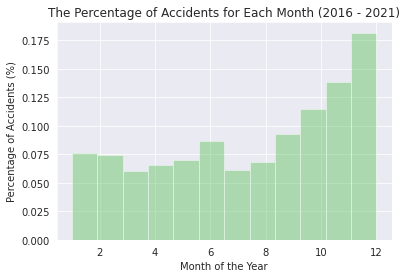

In [ ]:
#Month wise trend for every month in the year from 2016-2021
sns.distplot(df.Start_Time.dt.month, bins = 12, kde = False, norm_hist = True, color = '#4DBF4C')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents for Each Month (2016 - 2021)')

- There appears to be a trend where the later months of the year expereince the most amount of accidents.
- A quick google search says statistically more accidents should happen in the summer months since there are more people out enjoying the pleasant weather.
- I also think that January, a month in the middle of the winter, should have more accidents and think there might be an error in the dataset influencing this distribution.

#### What Year is Influencing the Month's Dataset?
- Is there a reason January is so low? Why are the summer months lower than expected?

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Percentage of Accidents for the Months of 2016')

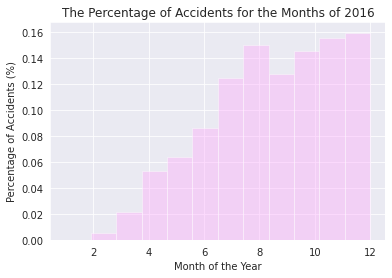

In [ ]:
#looking at a particular year
df_2016 = df[df.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True, color = '#FFA9FC')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents for the Months of 2016')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Percentage of Accidents for the Months of 2017')

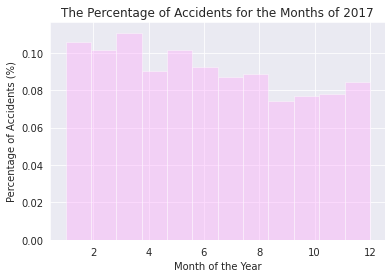

In [ ]:
#looking at a particular year
df_2017 = df[df.Start_Time.dt.year == 2017]
sns.distplot(df_2017.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True, color = '#FFA9FC')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents for the Months of 2017')

Text(0.5, 1.0, 'The Percentage of Accidents for the Months of 2018')

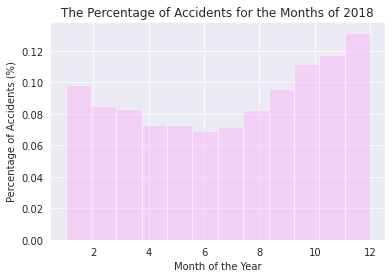

In [ ]:
#looking at a particular year
df_2018 = df[df.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True, color = '#FFA9FC')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents for the Months of 2018')

Text(0.5, 1.0, 'The Percentage of Accidents for the Months of 2019')

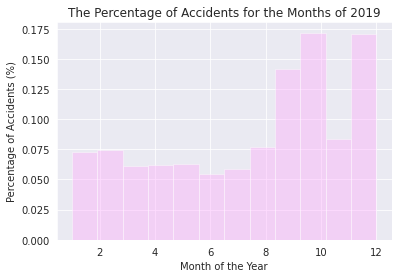

In [ ]:
#looking at a particular year
df_2019 = df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True, color = '#FFA9FC')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents for the Months of 2019')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Percentage of Accidents for the Months of 2020')

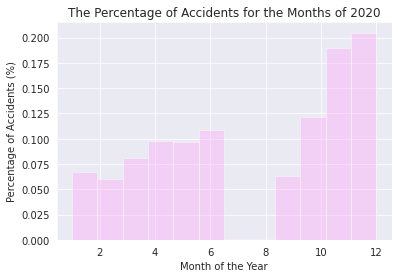

In [ ]:
#looking at a particular year
df_2020 = df[df.Start_Time.dt.year == 2020]
sns.distplot(df_2020.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True, color = '#FFA9FC')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents for the Months of 2020')

Text(0.5, 1.0, 'The Percentage of Accidents for the Months of 2021')

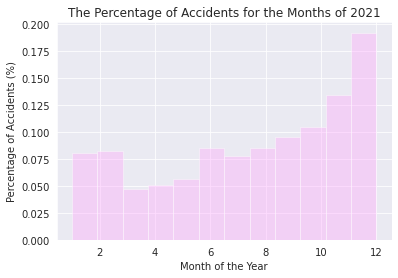

In [ ]:
#looking at a particular year
df_2021 = df[df.Start_Time.dt.year == 2021]
sns.distplot(df_2021.Start_Time.dt.month, bins = 12, kde=False, norm_hist=True, color = '#FFA9FC')
plt.xlabel('Month of the Year')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents for the Months of 2021')

- After Reviewing each years distribution, it is clear which years are responsible for influencing the overall dataset distribution.
- 1) The year 2016 is missing the data for the Month of January, this explains why the overall distribution has a rapid drop for January.
- 2) The year 2020 is missing data for the months of July and August, this explains why the summer months in the overall distribution have less accidents than we would expect for people's activity at that time.

### Start Latitude and Longitude Analysis


In [ ]:
#Looking at the data for the Latitude (The Vertical Component of the Coordinates)
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
#Looking at the data for the Longitude (The Horizontal Component of the Coordinates)
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

#### Plotting the Dataset onto a Scatterplot
- Utilizing different percentages of the dataset due to loadtime restrictions
- Also by using samples of varying sizes, we are provided a clearer picture of the hotzones for accidents on the map.

Text(0.5, 1.0, 'A Scatter Plot of a Sample of Accidents Across the US (2016 - 2021)')

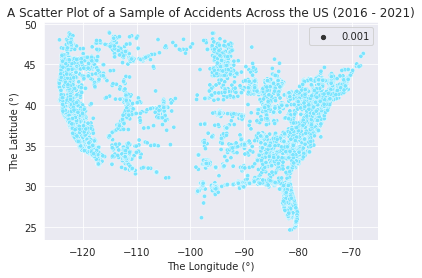

In [ ]:
#Creating a 1% sample of the data frame to plot onto a map
sample_df = df.sample(int(0.01 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size = 0.001, color = '#7AE4FE')
plt.xlabel('The Longitude (°)')
plt.ylabel('The Latitude (°)')
plt.title('A Scatter Plot of a 1% Sample of Accidents Across the US (2016 - 2021)')

- Notice there is a lot of density in accidents around the coast which makes sense since that is where most of the population is

Text(0.5, 1.0, 'A Scatter Plot of a 5% Sample of Accidents Across the US (2016 - 2021)')

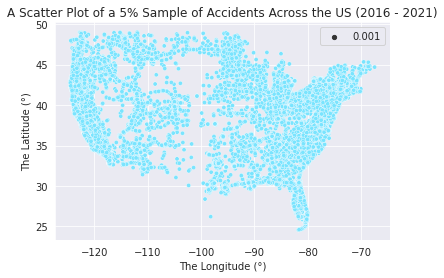

In [ ]:
#Creating a 5% sample of the data frame to plot onto a map
sample_df = df.sample(int(0.05 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size = 0.001, color = '#7AE4FE')
plt.xlabel('The Longitude (°)')
plt.ylabel('The Latitude (°)')
plt.title('A Scatter Plot of a 5% Sample of Accidents Across the US (2016 - 2021)')

Text(0.5, 1.0, 'A Scatter Plot of a 10% Sample of Accidents Across the US (2016 - 2021)')

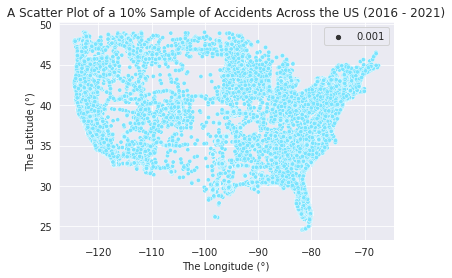

In [ ]:
#Creating a 10% sample of the data frame to plot onto a map
sample_df = df.sample(int(0.1 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size = 0.001, color = '#7AE4FE')
plt.xlabel('The Longitude (°)')
plt.ylabel('The Latitude (°)')
plt.title('A Scatter Plot of a 10% Sample of Accidents Across the US (2016 - 2021)')

Text(0.5, 1.0, 'A Scatter Plot of a 20% Sample of Accidents Across the US (2016 - 2021)')

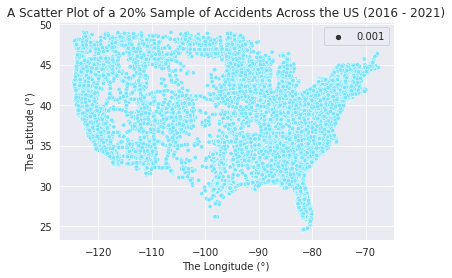

In [ ]:
#Creating a 20% sample of the data frame to plot onto a map
sample_df = df.sample(int(0.2 * len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size = 0.001, color = '#7AE4FE')
plt.xlabel('The Longitude (°)')
plt.ylabel('The Latitude (°)')
plt.title('A Scatter Plot of a 20% Sample of Accidents Across the US (2016 - 2021)')

- I noticed based on the sample size, it is clear to see that most accidents occur in major cities or along the coasts of the country. This makes the most sense since that is where a majority of the population is living.
- It is also clear that the bigger the sample size gets, there is more midwestern states appearing in the scatterplot.
- I could pursue further if there is a reason beyond population size that is responsible for the midwestern states having less accidents, such as weather patterns.

#### Creating an Interactive HeatMap with Folium Library
- Allow users to directly interact with the difference in accident hotzones utilizng a set sample size.
- The current sample size is arbitrarily set at 10%.

In [13]:
#Import folium libary to make an interactive map
import folium
from folium.plugins import HeatMap

In [ ]:
#Converting the dataframe into lists to use the Heatmap and then combining them into single pairs
zip(list(df.Start_Lat), list(df.Start_Lng))

In [14]:
sample_df_two = df.sample(int(0.01 * len(df)))
lat_lon_pairs = zip(list(sample_df_two.Start_Lat), list(sample_df_two.Start_Lng))

In [15]:
#Creating the map. maybe convert this into a log scale heatmap since data follows that
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

- The HeatMap allows for a clearer and closer analysis of the accident hotzones.
- This reassures our conclusion from before of more accidents happening along the coasts and in major cities.
- However, this still doesn't explain with data why accidents are more prone to happening in these locations besides denser population being inferred. 

#### Temperature Analysis
- I want to uncover if there is evidence that extreme temperatures are responsible for influencing the amount of accidents. 

In [ ]:
#Had difficulties pulling the temperature column from the dataset so checked for white spaces in the column name
df.columns = df.columns.str.strip()

In [ ]:
#Still couldn't pull the column by name but could index it 
df.iloc[:, 21] 

0          42.1
1          36.9
2          36.0
3          39.0
4          37.0
           ... 
2845337    86.0
2845338    70.0
2845339    73.0
2845340    71.0
2845341    79.0
Name: Temperature(F), Length: 2845342, dtype: float64

In [ ]:
#I renamed the index and was able to pull the column just fine
df.rename(columns = {df.columns[21]:'Temperature'}, inplace = True)
df.Temperature

0          42.1
1          36.9
2          36.0
3          39.0
4          37.0
           ... 
2845337    86.0
2845338    70.0
2845339    73.0
2845340    71.0
2845341    79.0
Name: Temperature, Length: 2845342, dtype: float64

#### Creating a Distribution Plot of Temperature per Accidents

Text(0.5, 1.0, 'The Percentage of Accidents by Temperature (F) (2016 - 2021)')

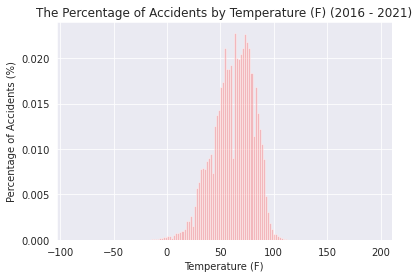

In [ ]:
sns.displot(df.Temperature, bins = 150, kde = False, norm_hist = True, color = '#FF6C6C')
plt.xlabel('Temperature (F)')
plt.ylabel('Percentage of Accidents (%)')
plt.title('The Percentage of Accidents by Temperature (F) (2016 - 2021)')

- The Dataset appears to follow a close normal distribution of accidents with the highest amount of accidents being around ~ 75 F.
- It is unclear that temperature has a correlation with the amount of accidents since the most amount of accidents happen at an average temperature that is experienced across the US.
- This could be examined further by perfoming linear regressions using temperature and other variables against the number of accidents to see if there is relationship present. 

## Summary and Conclusion

Again, this study serves as an insight into what factors might potentially be causing more accidents on the road and used as a stepping stone for the future to make our roads safer.


Insights:
- This dataset doesn't include New York. This should be remembered for any conclusions we draw from the analysis.
- There were a total of 11,682 unique cities in the dataset with Miami expereincing the most accidents, 106,966, from 2016 - 2021.
- There are only 496, ~4.2%, of the total cities that experience over 1000 accidents.
- The peak time of day for accidents in the week are 6 - 9 am and 3 - 6 pm.(Probably due to rush hour commuting)
- Sunday has a different distribution of accidents with a predominant distribution in the afternoon. (Most likely because people are getting off of work or visiting friends)
- Analyzing the months of the year revealed 2016 is missing January data and 2020 is missing July and August information that was skewing the total amount of accidents for the dataset.
- Utilizing different sample sizes on the scatter plot revelaed most accidents are more likely to happen in dense populated cities along the coast than states in the midwest. (This is supported by the HeatMap)
- Temperature has a roughly normal distribution of accidents at roughly 61.8 F. 

### Future Directions?
I acknowledge that this isn’t an entirely conclusive study since there is still a lot more columns that could be researched to find key accidents influencing the amount of accidents. For the future, I'd recommend looking into more of the columns realting to weather conditions such as:
- Humidity
- Pressure
- Visibility
- Wind Direction
- Weather Condition 

These are all columns that would provide valuable information for the amount of accidents occuring that I didn't get a chance to touch on.